# **<center> Project Milestone  - 3**
## <center> Cleaning/Formatting Website Data

<center> DSC-540

<center> Kalyan Pothineni

In [ ]:
# Import Libraries as needed
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
from fuzzywuzzy import fuzz, process
import matplotlib.pyplot as plt

In [72]:
# UN data from FAOSTAT for North America
na_url = "http://data.un.org/en/reg/g21.html"
na_response = requests.get(na_url)

# Check if the request was successful
if na_response.status_code == 200:
    na_html_content = na_response.text
else:
    print("Failed to retrieve the webpage.")
    exit()


In [73]:
na_soup = BeautifulSoup(na_html_content, "html.parser")

In [76]:
# Find the table element that contains the data
na_table = na_soup.find("table", class_="pure-table")

In [77]:
# Initialize empty lists to store the data
data = []

In [78]:
# Extract the data from the table rows
na_rows = na_table.find_all("tr")
for row in na_rows:
    # Assuming each row has data in "td" elements, modify accordingly if the structure is different
    cols = row.find_all("td")
    row_data = [col.text.strip() for col in cols]
    data.append(row_data)

# Convert the data into a DataFrame
na_df = pd.DataFrame(data)

# Optionally, you can set the first row as the column headers
na_df.columns = na_df.iloc[0]
na_df = na_df[1:]

# Drop duplicate rows based on all columns
na_df = na_df.drop_duplicates()

# Print the DataFrame for demonstration purposes
na_df

,Region,,Americas
1,"Population (000, 2021)",,371 108a
2,"Pop. density (per km2, 2021)",,19.9a
3,Surface area (km2),,18 651 660b
4,Sex ratio (m per 100 f),,"98a,c"


In [54]:
# Find the table element within the "Economic indicators" section
na_section_title = soup.find('summary', text='Economic indicators')
na_economic_table = section_title.find_next('table', class_='pure-table')

# Initialize empty lists to store the data
data = []
headers = []

In [55]:
# Extract the data from the table rows
rows = economic_table.find('tbody').find_all('tr')

In [97]:
# Use regular expressions to extract the "Economic indicators" section
na_economic_section = re.search(r'<summary>Economic indicators</summary>.*?</table>', na_html_content, re.DOTALL)
if not na_economic_section:
    print("Economic indicators section not found.")
    exit()

# Extract the table content from the economic section
na_table_content = na_economic_section.group()

# Read the table using pandas
na_eco_ind_df = pd.read_html(na_table_content)[0]

# Clean up the DataFrame
na_eco_ind_df = na_eco_ind_df.dropna(axis=1, how='all').dropna(axis=0, how='all').reset_index(drop=True)

# Print the DataFrame for demonstration purposes
na_eco_ind_df

,Unnamed: 0,2010,2015,2021
0,GDP: Gross domestic product (million current US$),16 618 456,19 803 583,23 185 108b
1,"GDP growth rate (annual %, const. 2015 prices)",2.6,2.9,2.1b
2,GDP per capita (current US$),48 410.6,55 468.3,63 244.4b
3,Employment in agricultured (% of employed),1.5,1.5,1.3e
4,Employment in industryd (% of employed),19.7,19.9,19.7e
5,Employment in servicesd (% employed),78.8,78.7,79e
6,Unemploymentd (% of labour force),9.5,5.5,4e
7,Labour force participation rated (female/male ...,58.0 / 70.1,56.4 / 68.6,56.4 / 68.0e
8,Agricultural production index (2014-2016=100),92,97,102b
9,International trade: exports (million current ...,1 665 220,1 911 491,1 821 863e


In [160]:
# Use regular expressions to extract the "Social indicators" section
na_social_indicators = re.search(r'<summary>Social indicators</summary>.*?</table>', na_html_content, re.DOTALL)
if not na_social_indicators:
    print("Social indicators section not found.")
    exit()

# Extract the table content from the economic section
na_table_content_soc = na_social_indicators.group()

# Read the table using pandas
na_soc_ind_df = pd.read_html(table_content_soc)[0]

# Clean up the DataFrame
na_soc_ind_df = na_soc_ind_df.dropna(axis=1, how='all').dropna(axis=0, how='all').reset_index(drop=True)

# Print the DataFrame for demonstration purposes
na_soc_ind_df

,Unnamed: 0,2010,2015,2021
0,"Population growth ratec,f (average annual %)",1,0.8,0.7e
1,Urban population (% of total population),80.8,81.6,82.4b
2,Urban population growth ratef (average annual %),1.1,1,...
3,"Fertility rate, totalc,f (live births per woman)",2,1.8,1.8e
4,"Life expectancy at birthc,f (females/males, ye...",80.9 / 75.9,81.6 / 76.8,81.6 / 76.7e
5,Population age distributionc (0-14/60+ years o...,19.8 / 18.5,18.9 / 20.7,18.0 / 23.5a
6,International migrant stock (000/% of total pop.),50 970.5 / 14.8,55 633.7 / 15.6,58 708.8 / 15.9e
7,Refugees and others of concern to UNHCR (000),...,655.4,1 233.1b
8,"Infant mortality ratec,f (per 1 000 live births)",6.7,5.8,5.7e
9,Education: Primary gross enrol. ratio (f/m per...,99.7 / 100.6,100.5 / 100.5,"101.3 / 101.3d,b"


In [99]:
# Use regular expressions to extract the "Environment and infrastructure indicators" section
na_env_indicators = re.search(r'<summary>Environment and infrastructure indicators</summary>.*?</table>', html_content, re.DOTALL)
if not na_env_indicators:
    print("Environment and infrastructure indicators section not found.")
    exit()

# Extract the table content from the economic section
na_table_content_env = na_env_indicators.group()

# Read the table using pandas
na_env_ind_df = pd.read_html(table_content_env)[0]

# Clean up the DataFrame
na_env_ind_df = na_env_ind_df.dropna(axis=1, how='all').dropna(axis=0, how='all').reset_index(drop=True)

# Print the DataFrame for demonstration purposes
na_env_ind_df

,Unnamed: 0,2010,2015,2021
0,Individuals using the Internet (per 100 inhabi...,72.5,76.1,88.9b
1,Research & Development expenditure (% of GDP),2.7,2.6,2.7g
2,Forested area (% of land area),35.4,35.5,35.5g
3,Important sites for terrestrial biodiversity p...,30.9,32,32.8e
4,Pop. using safely managed drinking water (urba...,96.5 / ...,96.9 / ...,97.4 / ...e
5,Pop. using safely managed sanitation (urban/ru...,91.3 / ...,92.1 / ...,92.7 / ...e


### Replace Headers

In [100]:
# Define the dictionary to rename the column(s)
new_column_names = {'Unnamed: 0': 'Economic Info'}

In [101]:
# Rename the column(s) using the rename() method for Economic Indicators
na_eco_ind_df.rename(columns=new_column_names, inplace=True)
na_eco_ind_df

,Economic Info,2010,2015,2021
0,GDP: Gross domestic product (million current US$),16 618 456,19 803 583,23 185 108b
1,"GDP growth rate (annual %, const. 2015 prices)",2.6,2.9,2.1b
2,GDP per capita (current US$),48 410.6,55 468.3,63 244.4b
3,Employment in agricultured (% of employed),1.5,1.5,1.3e
4,Employment in industryd (% of employed),19.7,19.9,19.7e
5,Employment in servicesd (% employed),78.8,78.7,79e
6,Unemploymentd (% of labour force),9.5,5.5,4e
7,Labour force participation rated (female/male ...,58.0 / 70.1,56.4 / 68.6,56.4 / 68.0e
8,Agricultural production index (2014-2016=100),92,97,102b
9,International trade: exports (million current ...,1 665 220,1 911 491,1 821 863e


In [118]:
# Define the dictionary to rename the column(s)
new_column_names_01 = {'Unnamed: 0': 'Social info'}

In [161]:
# Rename the column(s) using the rename() method for Social Indicators
na_soc_ind_df.rename(columns=new_column_names_01, inplace=True)
na_soc_ind_df

,Social info,2010,2015,2021
0,"Population growth ratec,f (average annual %)",1,0.8,0.7e
1,Urban population (% of total population),80.8,81.6,82.4b
2,Urban population growth ratef (average annual %),1.1,1,...
3,"Fertility rate, totalc,f (live births per woman)",2,1.8,1.8e
4,"Life expectancy at birthc,f (females/males, ye...",80.9 / 75.9,81.6 / 76.8,81.6 / 76.7e
5,Population age distributionc (0-14/60+ years o...,19.8 / 18.5,18.9 / 20.7,18.0 / 23.5a
6,International migrant stock (000/% of total pop.),50 970.5 / 14.8,55 633.7 / 15.6,58 708.8 / 15.9e
7,Refugees and others of concern to UNHCR (000),...,655.4,1 233.1b
8,"Infant mortality ratec,f (per 1 000 live births)",6.7,5.8,5.7e
9,Education: Primary gross enrol. ratio (f/m per...,99.7 / 100.6,100.5 / 100.5,"101.3 / 101.3d,b"


In [104]:
# Define the dictionary to rename the column(s)
new_column_names_02 = {'Unnamed: 0': 'Environmental indicators'}

In [105]:
# Rename the column(s) using the rename() method for Environmental Indicators
na_env_ind_df.rename(columns=new_column_names_02, inplace=True)
na_env_ind_df

,Environmental indicators,2010,2015,2021
0,Individuals using the Internet (per 100 inhabi...,72.5,76.1,88.9b
1,Research & Development expenditure (% of GDP),2.7,2.6,2.7g
2,Forested area (% of land area),35.4,35.5,35.5g
3,Important sites for terrestrial biodiversity p...,30.9,32,32.8e
4,Pop. using safely managed drinking water (urba...,96.5 / ...,96.9 / ...,97.4 / ...e
5,Pop. using safely managed sanitation (urban/ru...,91.3 / ...,92.1 / ...,92.7 / ...e


### Rename columns

In [108]:
# Convert column names to uppercase
na_eco_ind_df.columns = na_eco_ind_df.columns.str.upper()

# Replace spaces with underscores in column names
na_eco_ind_df.columns = na_eco_ind_df.columns.str.replace(' ', '_')

na_eco_ind_df.head()

,ECONOMIC_INFO,2010,2015,2021
0,GDP: Gross domestic product (million current US$),16 618 456,19 803 583,23 185 108b
1,"GDP growth rate (annual %, const. 2015 prices)",2.6,2.9,2.1b
2,GDP per capita (current US$),48 410.6,55 468.3,63 244.4b
3,Employment in agricultured (% of employed),1.5,1.5,1.3e
4,Employment in industryd (% of employed),19.7,19.9,19.7e


In [162]:
# Convert column names to uppercase (Social)
na_soc_ind_df.columns = na_soc_ind_df.columns.str.upper()

# Replace spaces with underscores in column names
na_soc_ind_df.columns = na_soc_ind_df.columns.str.replace(' ', '_')

na_soc_ind_df.head()

,SOCIAL_INFO,2010,2015,2021
0,"Population growth ratec,f (average annual %)",1,0.8,0.7e
1,Urban population (% of total population),80.8,81.6,82.4b
2,Urban population growth ratef (average annual %),1.1,1,...
3,"Fertility rate, totalc,f (live births per woman)",2,1.8,1.8e
4,"Life expectancy at birthc,f (females/males, ye...",80.9 / 75.9,81.6 / 76.8,81.6 / 76.7e


In [110]:
# Convert column names to uppercase (Environmental)
na_env_ind_df.columns = na_env_ind_df.columns.str.upper()

# Replace spaces with underscores in column names
na_env_ind_df.columns = na_env_ind_df.columns.str.replace(' ', '_')

na_env_ind_df.head()

,ENVIRONMENTAL_INDICATORS,2010,2015,2021
0,Individuals using the Internet (per 100 inhabi...,72.5,76.1,88.9b
1,Research & Development expenditure (% of GDP),2.7,2.6,2.7g
2,Forested area (% of land area),35.4,35.5,35.5g
3,Important sites for terrestrial biodiversity p...,30.9,32,32.8e
4,Pop. using safely managed drinking water (urba...,96.5 / ...,96.9 / ...,97.4 / ...e


### Format Data into More Readable Format

In [129]:
# Extract values in brackets using regular expressions and create a new column
na_eco_ind_df['INDICATOR'] = na_eco_ind_df['ECONOMIC_INFO'].str.extract(r'\(([^)]+)\)')

# Remove the values in brackets from the original "ECONOMIC_INFO" column
na_eco_ind_df['ECONOMIC_INFO'] = na_eco_ind_df['ECONOMIC_INFO'].str.replace(r'\([^)]+\)', '', regex=True)

# Remove ",f" from the "ECONOMIC_INFO" column
na_eco_ind_df['ECONOMIC_INFO'] = na_eco_ind_df['ECONOMIC_INFO'].str.replace(r',f', '', regex=False)

na_eco_ind_df

,ECONOMIC_INFO,2010,2015,2021,INDICATOR
0,GDP: Gross domestic product,16 618 456,19 803 583,23 185 108b,million current US$
1,GDP growth rate,2.6,2.9,2.1b,"annual %, const. 2015 prices"
2,GDP per capita,48 410.6,55 468.3,63 244.4b,current US$
3,Employment in agricultured,1.5,1.5,1.3e,% of employed
4,Employment in industryd,19.7,19.9,19.7e,% of employed
5,Employment in servicesd,78.8,78.7,79e,% employed
6,Unemploymentd,9.5,5.5,4e,% of labour force
7,Labour force participation rated,58.0 / 70.1,56.4 / 68.6,56.4 / 68.0e,female/male pop. %
8,Agricultural production index,92,97,102b,2014-2016=100
9,International trade: exports,1 665 220,1 911 491,1 821 863e,million current US$


In [163]:
# Extract values in brackets using regular expressions and create a new column
na_soc_ind_df['INDICATOR'] = na_soc_ind_df['SOCIAL_INFO'].str.extract(r'\(([^)]+)\)')

# Remove the values in brackets from the original "SOCIAL_INFO" column
na_soc_ind_df['SOCIAL_INFO'] = na_soc_ind_df['SOCIAL_INFO'].str.replace(r'\([^)]+\)', '', regex=True)

# Remove ",f" from the "SOCIAL_INFO" column
na_soc_ind_df['SOCIAL_INFO'] = na_soc_ind_df['SOCIAL_INFO'].str.replace(r',f', '', regex=False)

na_soc_ind_df

,SOCIAL_INFO,2010,2015,2021,INDICATOR
0,Population growth ratec,1,0.8,0.7e,average annual %
1,Urban population,80.8,81.6,82.4b,% of total population
2,Urban population growth ratef,1.1,1,...,average annual %
3,"Fertility rate, totalc",2,1.8,1.8e,live births per woman
4,Life expectancy at birthc,80.9 / 75.9,81.6 / 76.8,81.6 / 76.7e,"females/males, years"
5,Population age distributionc,19.8 / 18.5,18.9 / 20.7,18.0 / 23.5a,"0-14/60+ years old, %"
6,International migrant stock,50 970.5 / 14.8,55 633.7 / 15.6,58 708.8 / 15.9e,000/% of total pop.
7,Refugees and others of concern to UNHCR,...,655.4,1 233.1b,000
8,Infant mortality ratec,6.7,5.8,5.7e,per 1 000 live births
9,Education: Primary gross enrol. ratio,99.7 / 100.6,100.5 / 100.5,"101.3 / 101.3d,b",f/m per 100 pop.


In [132]:
# Extract values in brackets using regular expressions and create a new column
na_env_ind_df['INDICATOR'] = na_env_ind_df['ENVIRONMENTAL_INDICATORS'].str.extract(r'\(([^)]+)\)')

# Remove the values in brackets from the original "ENVIRONMENTAL_INDICATORS" column
na_env_ind_df['ENVIRONMENTAL_INDICATORS'] = na_env_ind_df['ENVIRONMENTAL_INDICATORS'].str.replace(r'\([^)]+\)', '', regex=True)

# Remove ",f" from the "ENVIRONMENTAL_INDICATORS" column
na_env_ind_df['ENVIRONMENTAL_INDICATORS'] = na_env_ind_df['ENVIRONMENTAL_INDICATORS'].str.replace(r',f', '', regex=False)

na_env_ind_df

,ENVIRONMENTAL_INDICATORS,2010,2015,2021,INDICATOR
0,Individuals using the Internet,72.5,76.1,88.9b,per 100 inhabitants
1,Research & Development expenditure,2.7,2.6,2.7g,% of GDP
2,Forested area,35.4,35.5,35.5g,% of land area
3,Important sites for terrestrial biodiversity p...,30.9,32,32.8e,%
4,Pop. using safely managed drinking water,96.5 / ...,96.9 / ...,97.4 / ...e,"urban/rural, %"
5,Pop. using safely managed sanitation,91.3 / ...,92.1 / ...,92.7 / ...e,urban/rural %


### Find Duplicates

In [133]:
# Find duplicates based on all columns (Ecomonic)
duplicates_eco = na_eco_ind_df.duplicated()

# Filter the DataFrame to show only duplicates
duplicated_rows = na_eco_ind_df[duplicates_eco]

# Print the duplicated rows for demonstration purposes
print(duplicated_rows)

Empty DataFrame
Columns: [ECONOMIC_INFO, 2010, 2015, 2021, INDICATOR]
Index: []


In [164]:
# Find duplicates based on all columns (Social)
duplicates_soc = na_soc_ind_df.duplicated()

# Filter the DataFrame to show only duplicates
duplicated_rows = na_soc_ind_df[duplicates_soc]

# Print the duplicated rows for demonstration purposes
print(duplicated_rows)

Empty DataFrame
Columns: [SOCIAL_INFO, 2010, 2015, 2021, INDICATOR]
Index: []


In [135]:
# Find duplicates based on all columns (Environmental)
duplicates_env = na_env_ind_df.duplicated()

# Filter the DataFrame to show only duplicates
duplicated_rows = na_env_ind_df[duplicates_env]

# Print the duplicated rows for demonstration purposes
print(duplicated_rows)

Empty DataFrame
Columns: [ENVIRONMENTAL_INDICATORS, 2010, 2015, 2021, INDICATOR]
Index: []


### Fuzzy Matching

In [171]:
# Define the search string for fuzzy matching (Economic)
search_string = 'GDP'

# Perform fuzzy matching and calculate similarity scores for each row
matches = na_eco_ind_df['ECONOMIC_INFO'].apply(lambda x: process.extractOne(search_string, [x]))

# Extract the matched strings and their similarity scores from the tuples
na_eco_ind_df['MATCHED_STRING'] = [x[0] for x in matches]
na_eco_ind_df['SIMILARITY_SCORE'] = [x[1] for x in matches]

# Filter the rows that have a similarity score above a certain threshold (e.g., 80)
threshold = 80
matched_rows = na_eco_ind_df[na_eco_ind_df['SIMILARITY_SCORE'] >= threshold]

# Print the matched rows 
matched_rows

,ECONOMIC_INFO,2010,2015,2021,INDICATOR,MATCHED_STRING,SIMILARITY_SCORE
1,GDP growth rate,2.6,2.9,2.1b,"annual %, const. 2015 prices",GDP growth rate,90
2,GDP per capita,48 410.6,55 468.3,63 244.4b,current US$,GDP per capita,90


In [170]:
# Define the search string for fuzzy matching (Social)
search_string = 'Education'

# Perform fuzzy matching and calculate similarity scores for each row
matches = na_soc_ind_df['SOCIAL_INFO'].apply(lambda x: process.extractOne(search_string, [x]))

# Extract the matched strings and their similarity scores from the tuples
na_soc_ind_df['MATCHED_STRING'] = [x[0] for x in matches]
na_soc_ind_df['SIMILARITY_SCORE'] = [x[1] for x in matches]

# Filter the rows that have a similarity score above a certain threshold (e.g., 80)
threshold = 80
matched_rows = na_soc_ind_df[na_soc_ind_df['SIMILARITY_SCORE'] >= threshold]

# Print the matched rows 
matched_rows

,SOCIAL_INFO,2010,2015,2021,INDICATOR,MATCHED_STRING,SIMILARITY_SCORE
9,Education: Primary gross enrol. ratio,99.7 / 100.6,100.5 / 100.5,"101.3 / 101.3d,b",f/m per 100 pop.,Education: Primary gross enrol. ratio,90
10,Education: Secondary gross enrol. ratio,95.9 / 95.1,99.3 / 98.3,"100.2 / 100.9d,b",f/m per 100 pop.,Education: Secondary gross enrol. ratio,90
11,Education: Upper secondary gross enrol. ratio,91.8 / 90.8,97.8 / 96.1,"97.9 / 98.6d,b",f/m per 100 pop.,Education: Upper secondary gross enrol. ratio,90


In [174]:
# Define the search string for fuzzy matching (Environmental)
search_string = 'Safely'

# Perform fuzzy matching and calculate similarity scores for each row
matches = na_env_ind_df['ENVIRONMENTAL_INDICATORS'].apply(lambda x: process.extractOne(search_string, [x]))

# Extract the matched strings and their similarity scores from the tuples
na_env_ind_df['MATCHED_STRING'] = [x[0] for x in matches]
na_env_ind_df['SIMILARITY_SCORE'] = [x[1] for x in matches]

# Filter the rows that have a similarity score above a certain threshold (e.g., 80)
threshold = 80
matched_rows = na_env_ind_df[na_env_ind_df['SIMILARITY_SCORE'] >= threshold]

# Print the matched rows 
matched_rows

,ENVIRONMENTAL_INDICATORS,2010,2015,2021,INDICATOR,MATCHED_STRING,SIMILARITY_SCORE
4,Pop. using safely managed drinking water,96.5 / ...,96.9 / ...,97.4 / ...e,"urban/rural, %",Pop. using safely managed drinking water,90
5,Pop. using safely managed sanitation,91.3 / ...,92.1 / ...,92.7 / ...e,urban/rural %,Pop. using safely managed sanitation,90


### Identify outliers and bad data

Missing Values:
ECONOMIC_INFO        0
2010                 6
2015                 6
2021                12
INDICATOR            0
MATCHED_STRING       0
SIMILARITY_SCORE     0
dtype: int64
Summary Statistics:
            2010       2015  2021  SIMILARITY_SCORE
count   6.000000   6.000000   0.0         12.000000
mean   34.016667  34.250000   NaN         39.166667
std    40.541308  42.429318   NaN         26.346755
min     1.500000   1.500000   NaN         20.000000
25%     4.325000   3.550000   NaN         20.000000
50%    14.600000  12.700000   NaN         27.000000
75%    64.025000  64.000000   NaN         42.000000
max    92.000000  97.000000   NaN         90.000000


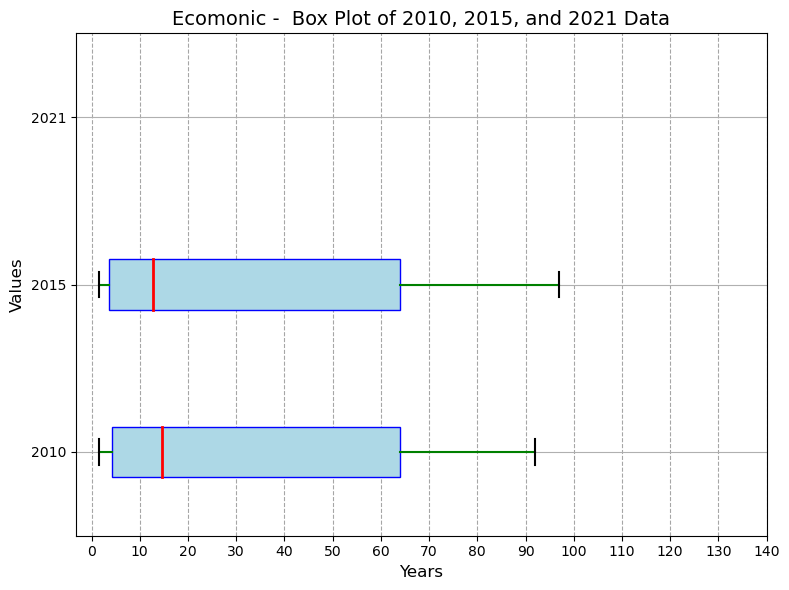

In [181]:
# Convert columns with numbers to numeric data type (Ecomonic)
na_eco_ind_df['2010'] = pd.to_numeric(na_eco_ind_df['2010'], errors='coerce')
na_eco_ind_df['2015'] = pd.to_numeric(na_eco_ind_df['2015'], errors='coerce')
na_eco_ind_df['2021'] = pd.to_numeric(na_eco_ind_df['2021'], errors='coerce')

# Check for missing values
print("Missing Values:")
print(na_eco_ind_df.isnull().sum())

# Summary statistics to identify outliers
print("Summary Statistics:")
print(na_eco_ind_df.describe())

# Create a figure and axes for the box plot
fig, ax = plt.subplots(figsize=(8, 6))

# Customize the box plot appearance
boxplot_props = dict(boxprops=dict(facecolor='lightblue', color='blue'),
                     medianprops=dict(color='red', linewidth=2),
                     whiskerprops=dict(color='green', linewidth=1.5),
                     capprops=dict(color='black', linewidth=1.5),
                     flierprops=dict(marker='o', markersize=5, markerfacecolor='red', markeredgecolor='red'),
                     patch_artist=True)

# Plot the box plot
na_eco_ind_df.boxplot(column=['2010', '2015', '2021'], ax=ax, vert=False, showfliers=True, **boxplot_props)

# Set axis labels and title
ax.set_xlabel('Years', fontsize=12)
ax.set_ylabel('Values', fontsize=12)
ax.set_title('Ecomonic -  Box Plot of 2010, 2015, and 2021 Data', fontsize=14)

# Customize ticks and grid
ax.set_xticks(range(0, 150, 10))
ax.xaxis.grid(True, linestyle='--', which='both', color='gray', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

Missing Values:
SOCIAL_INFO          0
2010                 7
2015                 6
2021                14
INDICATOR            0
MATCHED_STRING       0
SIMILARITY_SCORE     0
dtype: int64
Summary Statistics:
            2010       2015  2021  SIMILARITY_SCORE
count   7.000000    8.00000   0.0         14.000000
mean   16.442857   96.60000   NaN         57.142857
std    29.064346  227.43607   NaN         21.507985
min     1.000000    0.80000   NaN         22.000000
25%     1.550000    1.60000   NaN         42.500000
50%     4.500000    5.20000   NaN         60.000000
75%    12.850000   36.75000   NaN         60.000000
max    80.800000  655.40000   NaN         90.000000


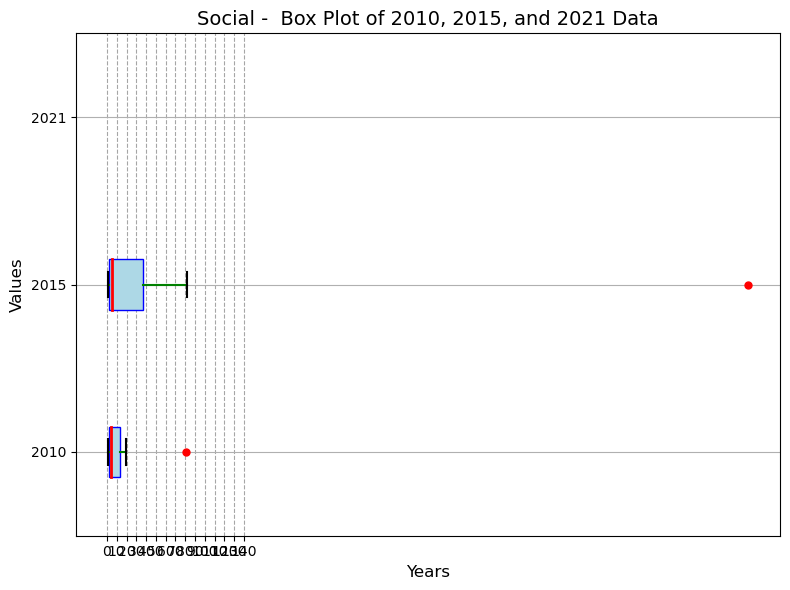

In [183]:
# Convert columns with numbers to numeric data type (Social)
na_soc_ind_df['2010'] = pd.to_numeric(na_soc_ind_df['2010'], errors='coerce')
na_soc_ind_df['2015'] = pd.to_numeric(na_soc_ind_df['2015'], errors='coerce')
na_soc_ind_df['2021'] = pd.to_numeric(na_soc_ind_df['2021'], errors='coerce')

# Check for missing values
print("Missing Values:")
print(na_soc_ind_df.isnull().sum())

# Summary statistics to identify outliers
print("Summary Statistics:")
print(na_soc_ind_df.describe())

# Create a figure and axes for the box plot
fig, ax = plt.subplots(figsize=(8, 6))

# Customize the box plot appearance
boxplot_props = dict(boxprops=dict(facecolor='lightblue', color='blue'),
                     medianprops=dict(color='red', linewidth=2),
                     whiskerprops=dict(color='green', linewidth=1.5),
                     capprops=dict(color='black', linewidth=1.5),
                     flierprops=dict(marker='o', markersize=5, markerfacecolor='red', markeredgecolor='red'),
                     patch_artist=True)

# Plot the box plot
na_soc_ind_df.boxplot(column=['2010', '2015', '2021'], ax=ax, vert=False, showfliers=True, **boxplot_props)

# Set axis labels and title
ax.set_xlabel('Years', fontsize=12)
ax.set_ylabel('Values', fontsize=12)
ax.set_title('Social -  Box Plot of 2010, 2015, and 2021 Data', fontsize=14)

# Customize ticks and grid
ax.set_xticks(range(0, 150, 10))
ax.xaxis.grid(True, linestyle='--', which='both', color='gray', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

Missing Values:
ENVIRONMENTAL_INDICATORS    0
2010                        2
2015                        2
2021                        6
INDICATOR                   0
MATCHED_STRING              0
SIMILARITY_SCORE            0
dtype: int64
Summary Statistics:
            2010       2015  2021  SIMILARITY_SCORE
count   4.000000   4.000000   0.0           6.00000
mean   35.375000  36.550000   NaN          50.00000
std    28.670237  30.213739   NaN          31.06123
min     2.700000   2.600000   NaN          28.00000
25%    23.850000  24.650000   NaN          28.50000
50%    33.150000  33.750000   NaN          32.00000
75%    44.675000  45.650000   NaN          76.00000
max    72.500000  76.100000   NaN          90.00000


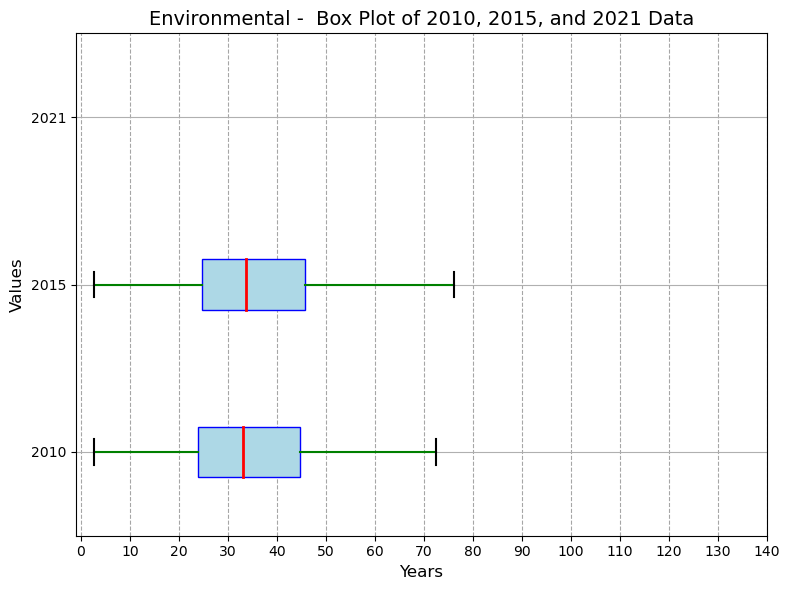

In [184]:
# Convert columns with numbers to numeric data type (Environmental)
na_env_ind_df['2010'] = pd.to_numeric(na_env_ind_df['2010'], errors='coerce')
na_env_ind_df['2015'] = pd.to_numeric(na_env_ind_df['2015'], errors='coerce')
na_env_ind_df['2021'] = pd.to_numeric(na_env_ind_df['2021'], errors='coerce')

# Check for missing values
print("Missing Values:")
print(na_env_ind_df.isnull().sum())

# Summary statistics to identify outliers
print("Summary Statistics:")
print(na_env_ind_df.describe())

# Create a figure and axes for the box plot
fig, ax = plt.subplots(figsize=(8, 6))

# Customize the box plot appearance
boxplot_props = dict(boxprops=dict(facecolor='lightblue', color='blue'),
                     medianprops=dict(color='red', linewidth=2),
                     whiskerprops=dict(color='green', linewidth=1.5),
                     capprops=dict(color='black', linewidth=1.5),
                     flierprops=dict(marker='o', markersize=5, markerfacecolor='red', markeredgecolor='red'),
                     patch_artist=True)

# Plot the box plot
na_env_ind_df.boxplot(column=['2010', '2015', '2021'], ax=ax, vert=False, showfliers=True, **boxplot_props)

# Set axis labels and title
ax.set_xlabel('Years', fontsize=12)
ax.set_ylabel('Values', fontsize=12)
ax.set_title('Environmental -  Box Plot of 2010, 2015, and 2021 Data', fontsize=14)

# Customize ticks and grid
ax.set_xticks(range(0, 150, 10))
ax.xaxis.grid(True, linestyle='--', which='both', color='gray', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

-------------------------------------------------------------------------------------------------------------------

### Ethical Assessment of cleaning/formatting website data (FAOSTAT/UN Data)

1. Introduction:
The data analysis exercise involved exploring and processing data from the United Nations (UN) related to Economical, Social, and Environmental indicators. The purpose was to gain valuable insights into these areas and identify potential trends and patterns to inform global policies and sustainable development goals Data was sourced from opensource UN data which is the main source for FAOSTAT website which has downloadable datasets bulk datasets. Stakeholders in this phase would include UN data analysts, statisticians, and experts responsible for ensuring transparency, data integrity, and accuracy during the data preparation process.

2. Data Collection:
The UN collects and aggregates data from various member countries and international organizations to create a comprehensive database of global indicators. Stakeholders involved in data collection include UN representatives, national statistical offices, international agencies, and data providers from member countries. 

3. Data Cleaning and Preprocessing:
The data cleaning process involved addressing missing values, standardizing casing, and removing inconsistent values. While data cleaning is essential for accurate analysis, it is crucial to consider the ethical implications of manipulating data. Transparency in the data cleaning process is necessary to maintain data integrity and ensure reproducibility. 

4. Data Analysis:
Various data analysis techniques, including summary statistics, box plots, and fuzzy matching, were employed to understand the social indicators' trends and relationships. 

5. Identifying Outliers and Bad Data:
Outliers were identified using box plots, which can impact the overall data analysis results. Handling outliers should be done cautiously, as excluding them may introduce bias, and addressing them can affect the integrity of the data.

6. Handling Missing Values:
Missing values were handled by converting them to numeric data type. 

7. Fuzzy Matching:
Fuzzy matching was used to compare data and identify similarities

8. Casing and Inconsistent Values:
Standardizing casing and fixing inconsistent values can improve data consistency and readability. 

9. Visualization and Communication:
The box plot visualization was used to identify outliers. 

10. Conclusion:
The data analysis exercise provided valuable insights into Economical, Social, and Environmental indicators from UN data. Collaborative efforts from the stakeholders will help address ethical concerns effectively, support evidence-based policymaking, and contribute to global development and sustainable goals. 
